# 1. Instance Based Learning Vs. Model Based Learning

K-nearest neighbors works by finding similar, labelled examples from the training set for each instance in the test set and uses them to predict the label. K-nearest neighbors is known as an [instance-based learning algorithm](https://en.wikipedia.org/wiki/Instance-based_learning) because it relies completely on previous instances to make predictions. `The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column.`

Because the entire training dataset is used to find a new instance's nearest neighbors to make label predictions, this algorithm doesn't scale well to medium and larger datasets. If we have a million instances in our training data set and we want to make predictions for a hundred thousand new instances, we'd have to sort the million instances in the training set by Euclidean distance for each instance.

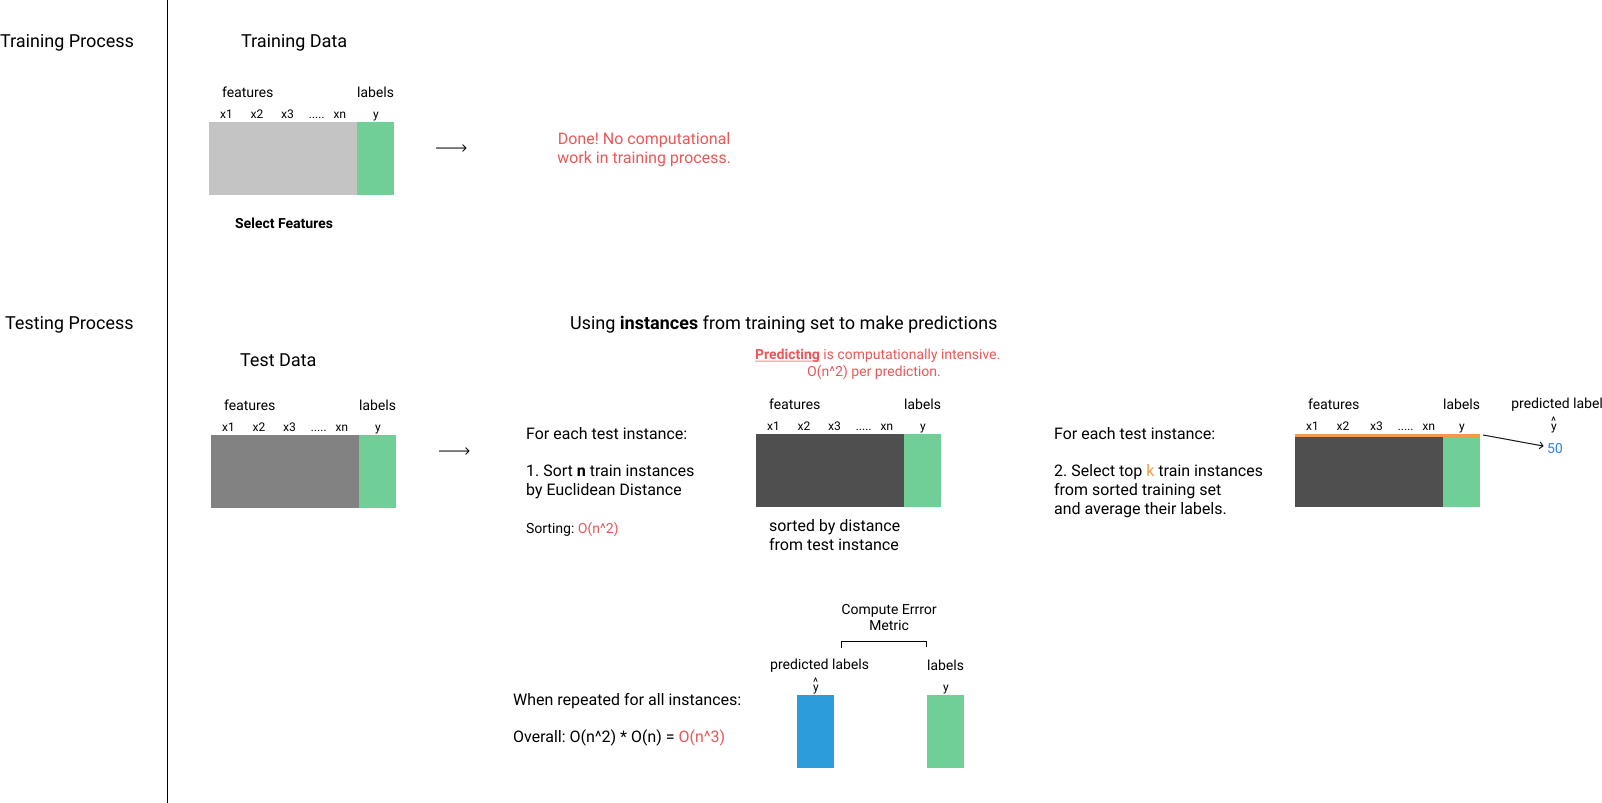

In [1]:
from IPython.display import SVG
SVG(filename='knn_complexity.svg')

We need to instead learn about **parametric machine learning approaches,** like linear regression and logistic regression. Unlike the k-nearest neighbors algorithm, the result of the training process for these machine learning algorithms is `a mathematical function that best approximates the patterns in the training set. In machine learning, this function is often referred to as a model.`

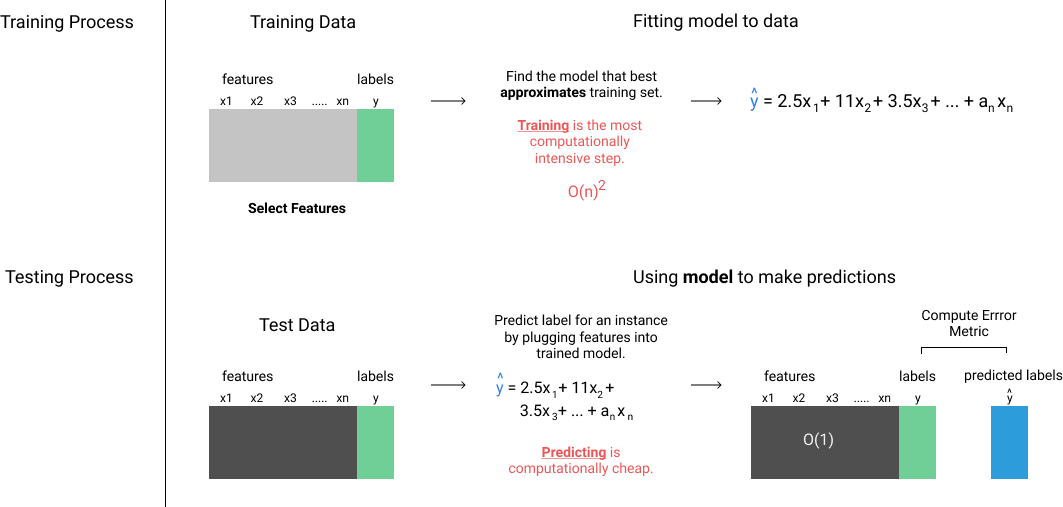

In [2]:
from IPython.display import Image
Image(filename='regression_complexity.png')

# 2. Introduction To The Data

 In this course, we'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

* Which properties of a house most affect the final sale price?
* How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](https://doi.org/10.1080/10691898.2011.11889627) and download the dataset [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt).

## TODO:
* Read AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.
* Select the first 1460 rows from from data and assign to train.
* Select the remaining rows from data and assign to test.
* Use the dataframe.info() method to display information about each column.
* Read the data documentation to get more familiar with each column.
* Using the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), determine which column is the target column we want to predict. Assign the column name as a string to target.

In [3]:
import pandas as pd

data=pd.read_csv('AmesHousing.txt',delimiter='\t')

train=data[:1460]
test=data[1460:]

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

# 3. Simple Linear Regression

We'll start by understanding the univariate case of linear regression, also known as **simple linear regression.** The following equation is the general form of the simple linear regression model.



### $\hat{y} = a_1x_1 + a_0$

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. `On the other hand, $a_1$ and $a_2$ represent the parameter values that are specific to the dataset`. The goal of simple linear regression is to `find the optimal parameter values that best describe the relationship between the feature column and the target column`. 

## TODO:
* To explore the data, create a plot using the train dataframe.

* Create a figure with dimensions 7 x 15 containing three scatter plots in a single column:
* The first plot should plot the Garage Area column on the x-axis against the SalePrice column on the y-axis.
* The second one should plot the Gr Liv Area column on the x-axis against the SalePrice column on the y-axis.
* The third one should plot the Overall Cond column on the x-axis against the SalePrice column on the y-axis.

In [5]:
import matplotlib.pyplot as plt

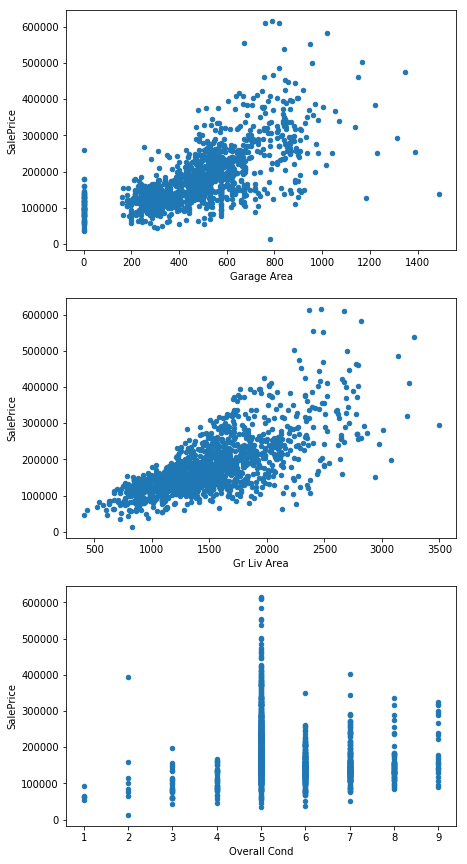

In [6]:
fig=plt.figure(figsize=(7,15))

ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

# 4. Least Squares

 we can tell that the Gr Liv Area feature correlates the most with the SalePrice column. We can confirm this by calculating the correlation between pairs of these columns using the pandas.DataFrame.corr() method:

In [7]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


### Residual Sum Of Squares

To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or RSS). If you recall, residual (often referred to as errors) describes the difference between the predicted values for the target column ($\hat{y}$) and the true values ($x_1$):


$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2$

We can shorten this to:

$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

If you recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error). Here's the formula for MSE, adapted for our new notation:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

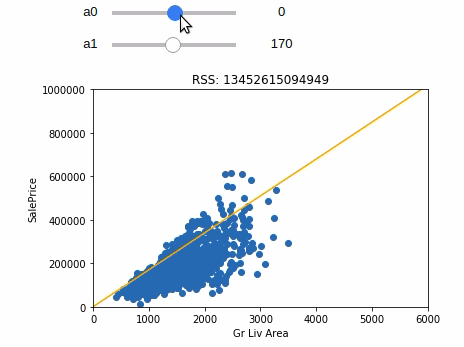

In [9]:
from IPython.display import Image
Image(filename='rss.gif')

# 5. Using Scikit-Learn To Train And Predict

The LinearRegression class also has it's own fit() method. Specific to this model, however, are the `coef_ and intercept_` attributes, which return $a_1$ ( $a_1$ to $a_n$ if it were a multivariate regression model) and $a_0$ accordingly.

## TODO:
* Import and instantiate a linear regression model.
* Fit a linear regression model that uses the feature and target columns. Use the default arguments.
* Display the coefficient and intercept of the fitted model using the coef_ and intercept_ attributes.
* Assign  to a1 and  to a0.

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056043


# 6. Making Predictions

## TODO:
* Calculate the RMSE value for the predictions on the training set and assign to train_rmse.
* Calculate the RMSE value for the predictions on the test set and assign to test_rmse.

In [11]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
prediction_t=lr.predict(train[['Gr Liv Area']])
train_mse=mean_squared_error(train[['SalePrice']],prediction_t)
train_rmse=train_mse**(1/2)

prediction_ts=lr.predict(test[['Gr Liv Area']])
test_mse=mean_squared_error(test['SalePrice'],prediction_ts)
test_rmse=test_mse**(1/2)

# 7. Multiple Linear Regression

 A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column.

When using multiple features, the **main challenge is selecting relevant features.**

## TODO:
* Train a linear regression model using the columns in cols.
* Use the fitted model to make predictions on both the training and test dataset.
* Calculate the RMSE value for the predictions on the training set and assign to train_rmse_2.
* Calculate the RMSE value for the predictions on the test set and assign to test_rmse_2.

In [12]:
cols = ['Overall Cond', 'Gr Liv Area']

In [13]:
lr=LinearRegression()
lr.fit(train[cols],train['SalePrice'])

prediction_train=lr.predict(train[cols])
train_mse=mean_squared_error(train['SalePrice'],prediction_train)
train_rmse_2=train_mse**(1/2)

prediction_test=lr.predict(test[cols])
test_mse=mean_squared_error(test['SalePrice'],prediction_test)
test_rmse_2=test_mse**(1/2)